## 데이터 불러오기

In [ ]:
# kaggle 업그레이드
!pip install kaggle --upgrade

In [ ]:
# kaggle 폴더 만들기
!mkdir -p ~/.kaggle

In [ ]:
# 본인의 kaggle api 사용
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                            title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                         Netflix Movies and TV Shows                       1MB  2024-04-10 09:48:38          22381        489  1.0              
jainaru/world-happiness-report-2024-yearly-updated             World Happiness Report- 2024                     62KB  2024-05-15 19:04:34           2118         39  1.0              
emirhanai/social-media-usage-and-emotional-well-being          Social Media Usage and Emotional Well-Being       8KB  2024-05-19 18:25:52            868         24  1.0              
jainaru/thyroid-disease-data                                   Thyroid Disease Data  

In [ ]:
!kaggle competitions download -c playground-series-s4e5

 89% 25.0M/28.0M [00:02<00:00, 15.5MB/s]
100% 28.0M/28.0M [00:02<00:00, 14.2MB/s]


In [ ]:
!unzip -q /content/playground-series-s4e5.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## train 확인하기

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
train.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

| 칼럼                     | 의미         |
|----------------------------------|-----------------------------|
| 'id'                             | 임의 ID                      |
| 'MonsoonIntensity'               | 장마 강도                   |
| 'TopographyDrainage'             | 지형 배수                   |
| 'RiverManagement'                | 강 관리                     |
| 'Deforestation'                  | 산림 파괴                   |
| 'Urbanization'                   | 도시화                      |
| 'ClimateChange'                  | 기후 변화                   |
| 'DamsQuality'                    | 댐 품질                     |
| 'Siltation'                      | 퇴적물 쌓임                |
| 'AgriculturalPractices'          | 농업 관행                   |
| 'Encroachments'                  | 침범                        |
| 'IneffectiveDisasterPreparedness'| 비효과적인 재난 대비        |
| 'DrainageSystems'                | 배수 시스템                 |
| 'CoastalVulnerability'           | 연안 취약성                 |
| 'Landslides'                     | 산사태                      |
| 'Watersheds'                     | 유역                        |
| 'DeterioratingInfrastructure'    | 악화된 인프라               |
| 'PopulationScore'                | 인구 점수                   |
| 'WetlandLoss'                    | 습지 상실                   |
| 'InadequatePlanning'             | 불충분한 계획               |
| 'PoliticalFactors'               | 정치적 요인                 |
| 'FloodProbability'               | 홍수 가능성                 |


In [ ]:
# id 칼럼을 제외한 나머지 칼럼 개수 : 21
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
train.columns.shape[0]

22

In [ ]:
train.head(10)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
5,5,5,4,1,4,2,4,6,6,7,...,3,5,5,4,4,6,8,3,2,0.440
6,6,8,3,1,2,3,7,3,4,6,...,2,5,6,4,5,6,3,4,6,0.460
7,7,6,6,5,7,5,5,3,5,5,...,5,3,5,5,8,6,8,5,6,0.595
8,8,5,2,8,5,4,5,2,4,5,...,9,2,7,3,4,6,4,5,5,0.505
9,9,4,2,3,5,8,6,5,5,7,...,6,3,3,4,4,3,3,5,6,0.455


## 각 칼럼별 변수 개수

In [ ]:
# 0~16까지
train['MonsoonIntensity'].value_counts().sort_index(ascending=True)

MonsoonIntensity
0       5431
1      28946
2      86683
3     160574
4     214344
5     220936
6     169080
7     109210
8      65954
9      33515
10     14040
11      5851
12      2062
13       729
14       391
15       169
16        42
Name: count, dtype: int64

In [ ]:
# 0~18 까지
train['TopographyDrainage'].value_counts().sort_index(ascending=True)

TopographyDrainage
0       5541
1      29422
2      90058
3     161989
4     213368
5     221252
6     159003
7     102681
8      72000
9      37544
10     15524
11      6177
12      2199
13       705
14       333
15       106
16        42
17        10
18         3
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['RiverManagement'].value_counts().sort_index(ascending=True)

RiverManagement
0       5407
1      28872
2      83782
3     160049
4     214079
5     218216
6     167368
7     108538
8      71204
9      36232
10     15170
11      5773
12      2120
13       715
14       297
15        92
16        43
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['Deforestation'].value_counts().sort_index(ascending=True)

Deforestation
0       5327
1      26881
2      85948
3     157331
4     219733
5     217793
6     169175
7     109039
8      69237
9      34585
10     13968
11      5706
12      2079
13       706
14       293
15       115
16        35
17         6
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['Urbanization'].value_counts().sort_index(ascending=True)

Urbanization
0       5350
1      29672
2      86122
3     162234
4     212438
5     216722
6     166703
7     107693
8      69295
9      36854
10     15690
11      5689
12      2211
13       791
14       313
15       137
16        36
17         7
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['ClimateChange'].value_counts().sort_index(ascending=True)

ClimateChange
0       5347
1      27326
2      88158
3     159728
4     214268
5     218995
6     169316
7     107802
8      69171
9      34687
10     14457
11      5516
12      2063
13       729
14       260
15        96
16        35
17         3
Name: count, dtype: int64

In [ ]:
# 0~16까지
train['DamsQuality'].value_counts().sort_index(ascending=True)

DamsQuality
0       5878
1      28605
2      84763
3     158316
4     216308
5     218237
6     164786
7     108185
8      71757
9      35903
10     15121
11      6504
12      2371
13       738
14       334
15       124
16        27
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['Siltation'].value_counts().sort_index(ascending=True)

Siltation
0       5381
1      28487
2      87322
3     160419
4     215232
5     222270
6     164780
7     106481
8      68231
9      35460
10     14815
11      5700
12      2108
13       781
14       320
15       142
16        28
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['AgriculturalPractices'].value_counts().sort_index(ascending=True)

AgriculturalPractices
0       5680
1      28587
2      85659
3     160403
4     214366
5     216644
6     168426
7     109213
8      69347
9      36004
10     14622
11      5900
12      2085
13       631
14       254
15        96
16        40
Name: count, dtype: int64

In [ ]:
# 0~18 까지
train['Encroachments'].value_counts().sort_index(ascending=True)

Encroachments
0       5531
1      27979
2      84628
3     160683
4     219708
5     219971
6     158864
7     106434
8      71237
9      37312
10     15952
11      6262
12      2145
13       750
14       343
15       110
16        33
17        13
18         2
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['IneffectiveDisasterPreparedness'].value_counts().sort_index(ascending=True)

IneffectiveDisasterPreparedness
0       5410
1      27756
2      85851
3     162862
4     217365
5     215502
6     162108
7     107059
8      73046
9      36869
10     15184
11      5725
12      2055
13       673
14       336
15       124
16        32
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['DrainageSystems'].value_counts().sort_index(ascending=True)

DrainageSystems
0       5582
1      28923
2      84440
3     159355
4     216278
5     217753
6     167358
7     108156
8      71360
9      34274
10     14737
11      6240
12      2203
13       786
14       325
15       133
16        44
17        10
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['CoastalVulnerability'].value_counts().sort_index(ascending=True)

CoastalVulnerability
0       5747
1      29108
2      84481
3     162674
4     213263
5     215378
6     164640
7     108310
8      73577
9      35817
10     14753
11      6602
12      2370
13       761
14       332
15        99
16        38
17         7
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['Landslides'].value_counts().sort_index(ascending=True)

Landslides
0       5516
1      29051
2      88129
3     163932
4     212833
5     213811
6     164085
7     109608
8      72274
9      35411
10     14442
11      5618
12      2114
13       699
14       297
15       106
16        31
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['Watersheds'].value_counts().sort_index(ascending=True)

Watersheds
0       5404
1      28867
2      88319
3     163564
4     213627
5     219756
6     159072
7     107309
8      71822
9      36087
10     14885
11      5734
12      2227
13       811
14       329
15        94
16        50
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['DeterioratingInfrastructure'].value_counts().sort_index(ascending=True)

DeterioratingInfrastructure
0       4953
1      29511
2      85513
3     162850
4     218713
5     213578
6     168782
7     107019
8      67551
9      35832
10     14684
11      5788
12      2110
13       639
14       285
15       111
16        34
17         4
Name: count, dtype: int64

In [ ]:
# 0~18 까지
train['PopulationScore'].value_counts().sort_index(ascending=True)

PopulationScore
0       5536
1      28093
2      87742
3     161487
4     221136
5     213102
6     163538
7     106364
8      72443
9      34422
10     14804
11      5852
12      2200
13       779
14       338
15        73
16        38
17         9
18         1
Name: count, dtype: int64

In [ ]:
# 0~19 까지
train['WetlandLoss'].value_counts().sort_index(ascending=True)

WetlandLoss
0       5192
1      27958
2      84515
3     161270
4     217045
5     214587
6     167265
7     109524
8      71347
9      34947
10     15041
11      5993
12      2141
13       689
14       299
15       102
16        37
17         3
18         1
19         1
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['InadequatePlanning'].value_counts().sort_index(ascending=True)

InadequatePlanning
0       5619
1      27889
2      85421
3     165051
4     214851
5     217756
6     162099
7     106401
8      71588
9      36289
10     15694
11      5919
12      2135
13       717
14       358
15       132
16        38
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['PoliticalFactors'].value_counts().sort_index(ascending=True)

PoliticalFactors
0       5995
1      28786
2      86873
3     164017
4     215557
5     211264
6     163682
7     108315
8      72800
9      35675
10     15286
11      6332
12      2278
13       691
14       273
15        90
16        43
Name: count, dtype: int64

## 각 변수들에 따른 FloodProbability

In [ ]:
# group을 지어서 각 값마다 FloodProbability 확률 구하기
group = {}

for i in range(0, 20):
    group_mean = train.groupby(train.columns[i])['FloodProbability'].mean()
    column_name = train.columns[i] + "_group"
    group[column_name] = group_mean
# 이 밑에는 삭제 가능(확인용)
for key, value in group.items():
    print("새로운 데이터프레임:", key)
    print(value)

새로운 데이터프레임: id_group
id
0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64
새로운 데이터프레임: MonsoonIntensity_group
MonsoonIntensity
0     0.478244
1     0.484460
2     0.489469
3     0.495122
4     0.500402
5     0.505637
6     0.510212
7     0.515177
8     0.517737
9     0.522664
10    0.525461
11    0.526936
12    0.533031
13    0.538676
14    0.527404
15    0.523166
16    0.542381
Name: FloodProbability, dtype: float64
새로운 데이터프레임: TopographyDrainage_group
TopographyDrainage
0     0.477622
1     0.483090
2     0.488279
3     0.495416
4     0.500890
5     0.506359
6     0.510623
7     0.515882
8     0.515528
9     0.520027
10    0.523754
11    0.526574
12    0.530223
13    0.537730
14    0.532973
15    0.524292
16    0.547262
17    0.558000
18    0.510000
Name: FloodProbability, dtype: float64
새로운 데이터

In [ ]:
# Flood Probability 가 최대인 행 찾기
train[train['FloodProbability']==train['FloodProbability'].max()]

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
41513,41513,11,7,5,7,7,6,7,9,5,...,6,5,11,5,7,7,7,7,8,0.725
54869,54869,9,8,7,9,7,5,7,4,7,...,7,6,7,7,5,9,8,8,5,0.725
126497,126497,12,8,11,7,6,8,9,7,5,...,7,7,6,7,7,6,5,4,7,0.725
167242,167242,4,6,6,6,2,4,3,7,11,...,12,5,9,5,9,13,3,7,11,0.725
174746,174746,2,11,7,12,10,6,4,0,11,...,8,5,5,8,12,7,3,7,8,0.725
212238,212238,7,7,7,6,8,6,7,4,8,...,8,5,6,6,5,5,5,11,8,0.725
225830,225830,5,6,6,8,7,5,7,6,11,...,5,10,10,4,5,6,14,5,7,0.725
355719,355719,11,6,6,7,7,6,3,3,8,...,5,6,5,14,7,6,5,4,3,0.725
365266,365266,3,10,7,4,11,7,6,7,6,...,7,5,6,5,13,12,7,5,6,0.725
374545,374545,11,7,5,5,5,6,7,6,3,...,8,4,8,10,3,7,7,6,10,0.725


In [ ]:
# Flood Probability 가 최대인 행 찾기
train[train['FloodProbability']==train['FloodProbability'].min()]

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
59103,59103,6,3,2,6,7,5,4,6,4,...,7,3,5,2,7,6,2,3,5,0.285
84801,84801,5,8,4,5,5,6,4,6,3,...,3,5,4,2,4,3,4,4,5,0.285
164256,164256,2,6,5,5,5,4,5,6,1,...,5,3,3,3,4,2,2,2,5,0.285
242964,242964,4,7,5,7,4,5,8,2,6,...,3,6,4,1,4,3,3,3,9,0.285
331323,331323,6,2,2,5,7,4,5,3,6,...,4,4,6,8,6,5,3,3,5,0.285
346019,346019,3,2,6,4,4,3,4,3,4,...,2,2,3,6,4,2,5,4,4,0.285
405506,405506,3,4,8,3,3,5,4,4,2,...,8,4,6,1,2,3,3,3,0,0.285
418131,418131,6,2,6,4,3,1,3,3,2,...,2,5,3,5,2,5,5,4,3,0.285
427820,427820,7,4,6,2,4,5,4,3,4,...,8,3,3,6,3,5,4,5,4,0.285
514690,514690,4,6,13,3,3,3,4,2,2,...,10,2,7,6,6,4,5,3,5,0.285


In [ ]:
# 필요없는 id 칼럼 삭제
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

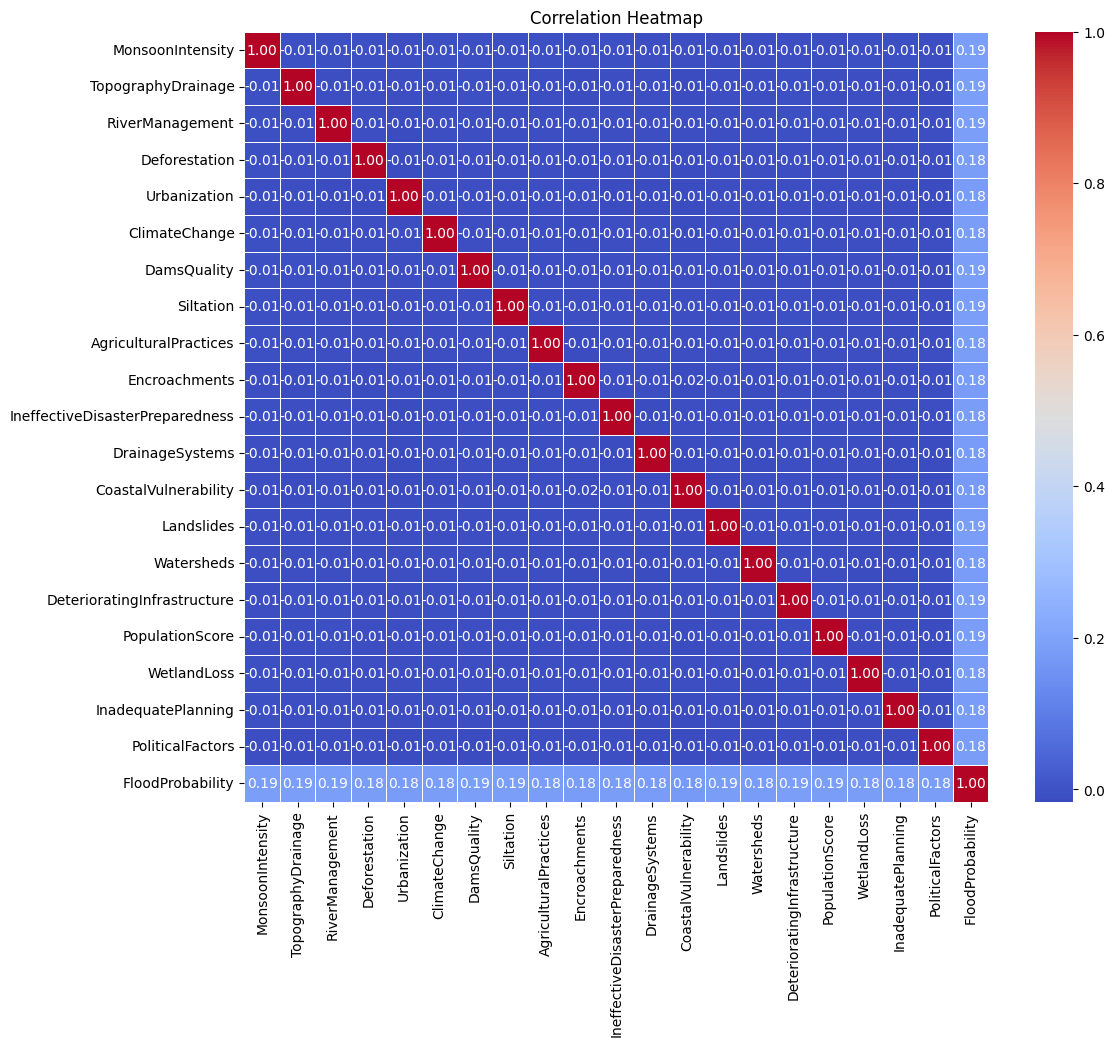

In [ ]:
# FloodProbability에 어떤 변수가 가장 큰 영향을 미치는지 확인
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬 계산
correlation_matrix = train.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# 최대가 0.19 이므로 특별하게 영향을 미치는 요인은 없는 것으로 판단

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


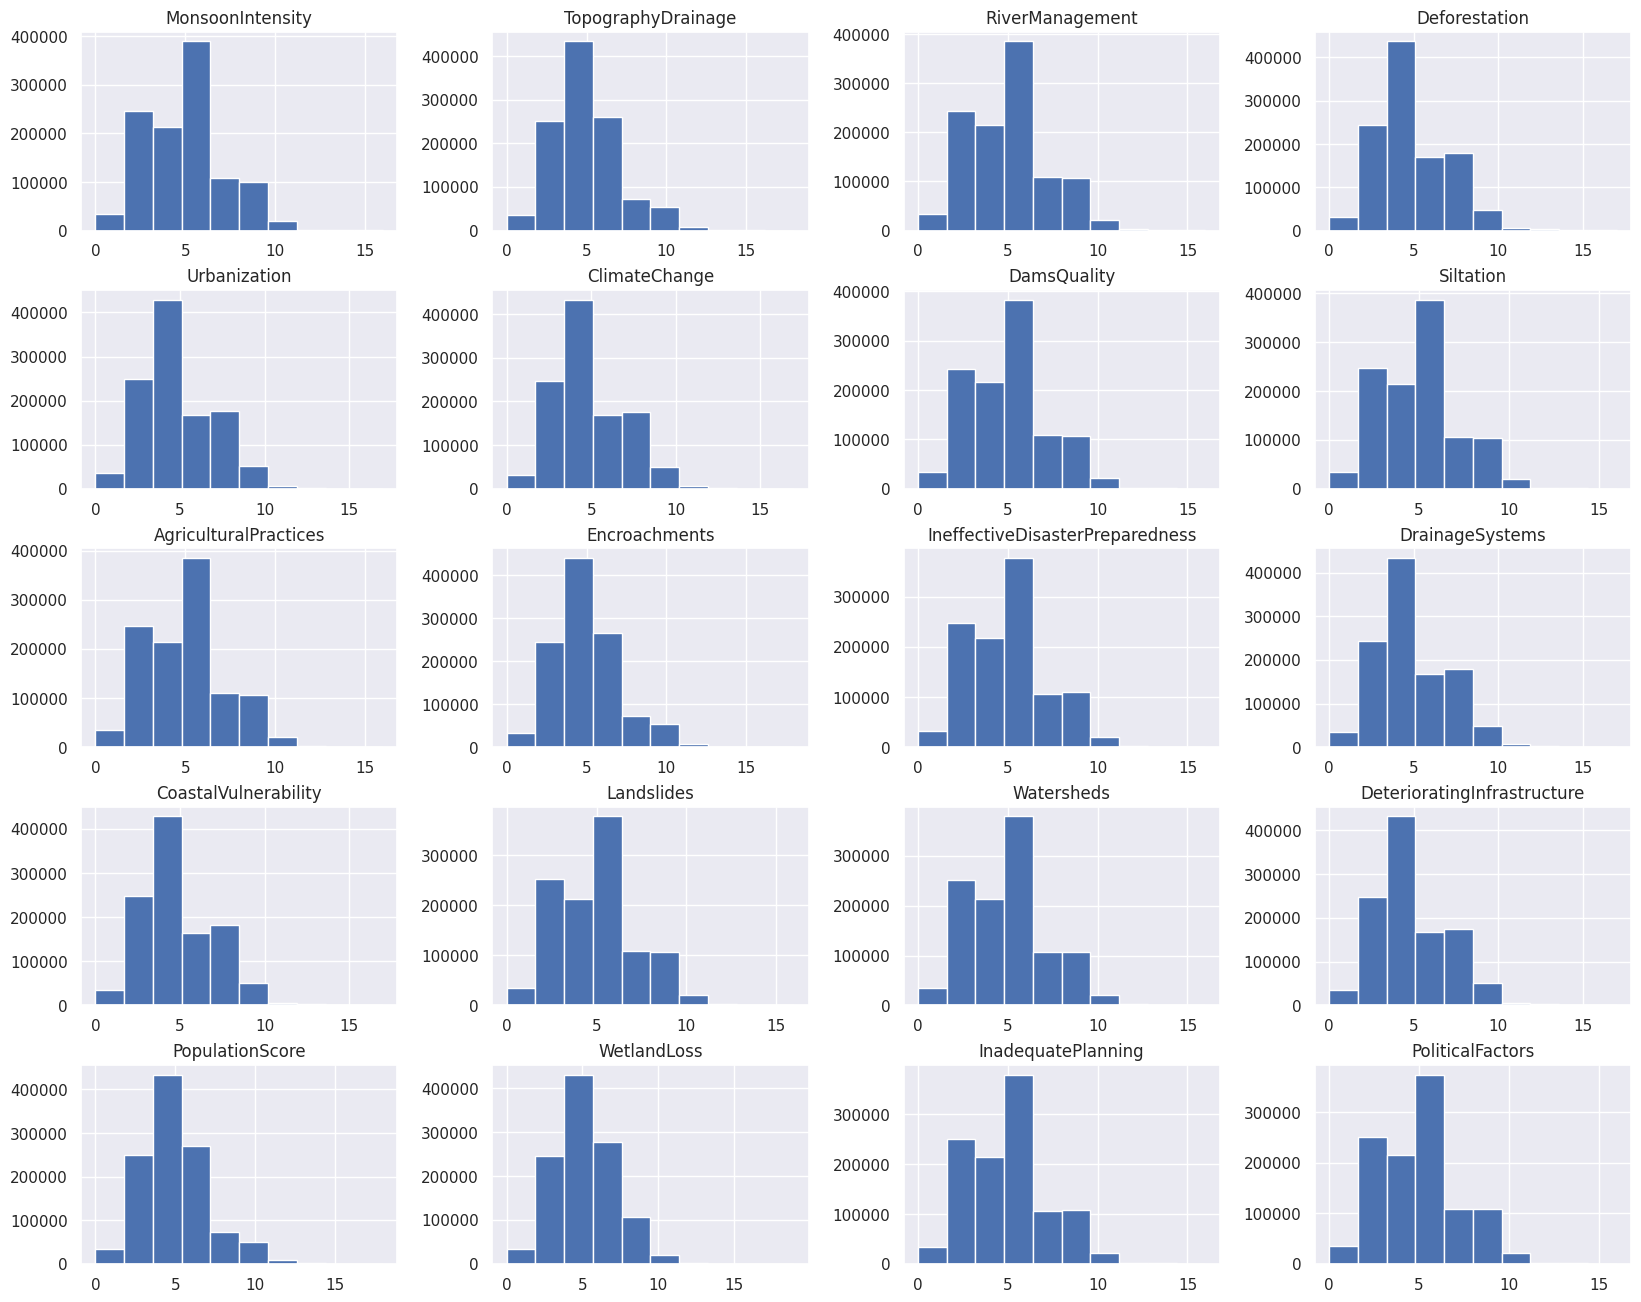

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize': (20, 16)})
# FloodProb 제거
train_graph = train.iloc[:, :-1]
train_graph.hist();

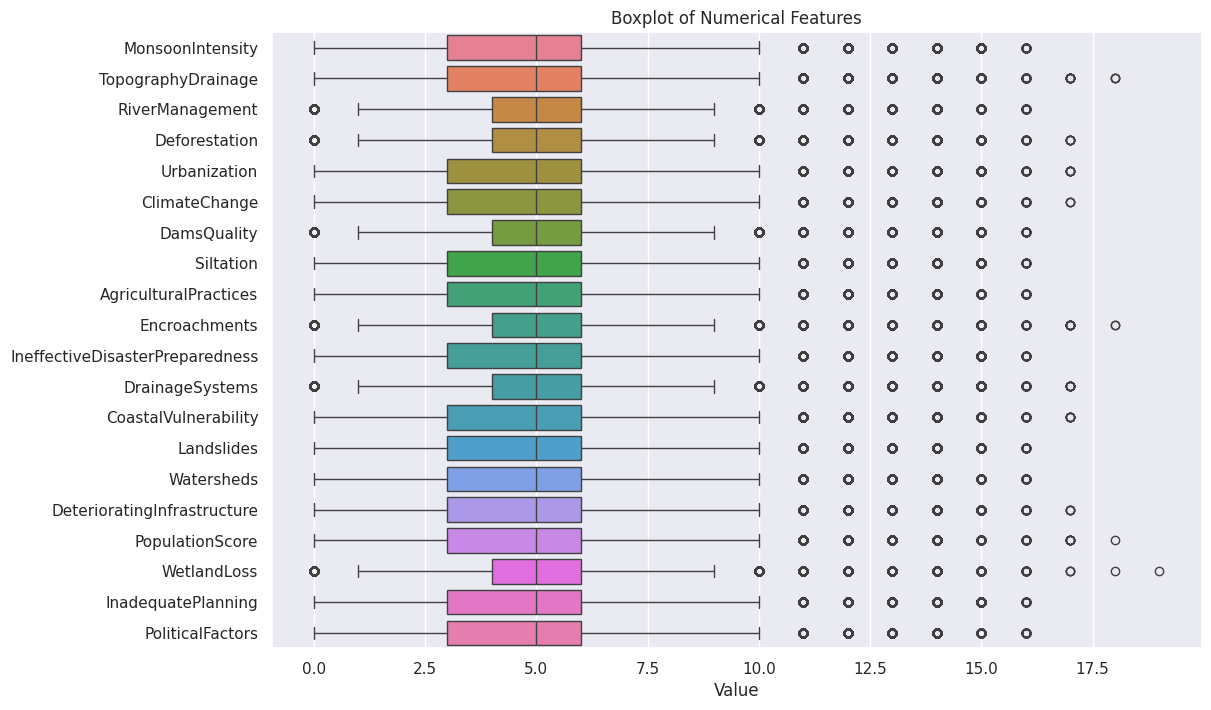

In [ ]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).drop(['FloodProbability'], axis=1).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=train[numeric_features], orient="h")
plt.title('Boxplot of Numerical Features')
plt.xlabel('Value')
plt.show()

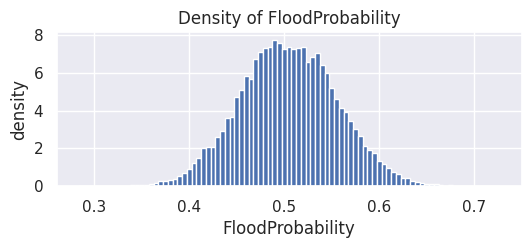

In [ ]:
import numpy as np
plt.figure(figsize=(6, 2))
plt.hist(train['FloodProbability'], bins=np.linspace(0.2825, 0.7275, 90), density=True)
plt.ylabel('density')
plt.xlabel('FloodProbability')
plt.title('Density of FloodProbability')
plt.show()

### 정규분포 가정

In [ ]:
from scipy.stats import shapiro
statistic, p_value = shapiro(train['FloodProbability'])
print("p-value:", p_value)
if p_value > 0.05:
    print("FloodProbability는 정규분포를 따른다")
else:
    print("FloodProbability는 정규분포를 따르지 않는다")

p-value: 1.0
FloodProbability는 정규분포를 따른다


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 모델링

1. 고차원의 데이터라서 PCA 적용 후 모델링 사용
2. feature selection 적용(변수선택법)
3. 머신러닝 예측 기법 사용
-----------------------------------------------
4. 딥러닝 기법 사용(기본 모델 + DropOut 적용 + callback 적용)

### 아무것도 안 한 Version(R^2 Score: 0.84495)

In [ ]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:-1]

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, train['FloodProbability'])

r_squared = model.score(X_train, train['FloodProbability'])
print('R-squared:', r_squared)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


R-squared: 0.8449501050792337
Coefficients: [0.00561159 0.00564756 0.00566643 0.00567915 0.00565772 0.00566253
 0.00565494 0.00563783 0.00563522 0.00564989 0.0056404  0.00563556
 0.00567088 0.00564163 0.0056465  0.00561563 0.0056775  0.00563494
 0.00560868 0.0056494 ]
Intercept: -0.05329907893699193


### StandardScaler

In [ ]:
# Train의 마지막 열인 FloodProbability 제외
X_train = train.loc[:,train.columns != 'FloodProbability']
X_train

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3,3,4,10,4,5,5,7,10,4,3,7,8,7,2,2,1,4,6,4
1117953,2,2,4,3,9,5,8,1,3,5,5,9,4,4,3,7,4,9,4,5
1117954,7,3,9,4,6,5,9,1,3,4,5,5,5,5,5,6,5,5,2,4
1117955,7,3,3,7,5,2,3,4,6,4,6,6,8,5,3,4,6,7,6,4


In [ ]:
# Train의 마지막 열인 FloodProbability 제외
X_test = test.loc[:,test.columns != 'FloodProbability']
X_test

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,5,4,8,3,5,4,4,5,5,5,5,6,1,3,5,6,4,4,6,6
745301,4,4,2,12,4,3,4,3,5,5,3,7,4,4,3,5,5,3,5,4
745302,5,7,9,5,5,6,7,5,5,3,6,11,3,11,4,5,9,5,5,4
745303,4,7,6,3,5,2,3,8,6,7,6,6,8,6,2,3,8,7,5,5


In [ ]:
# Mean과 SD가 어느정도 크게 차이가 나지는 않지만 분석의 용의를 위해 표준화
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
# 데이터 확인
X_train[:10]

array([[ 0.03819786,  1.46776894,  0.02156078,  1.49036255,  0.50757824,
        -0.45394109, -0.45888097, -0.93310708, -0.939124  , -0.45563245,
        -1.41724744,  0.02562654, -0.93542106, -0.9293119 ,  0.03407994,
        -0.44842187,  0.99918279,  0.02375436,  0.98956852, -0.92759812],
       [ 0.52448798,  0.99018623, -0.46102151, -0.45925107,  1.46755213,
         1.48993819, -0.93894347,  0.03495146, -0.4556922 ,  0.50437216,
         1.9511494 ,  0.99072279, -1.41414239, -2.37280922, -0.92635319,
         0.03588375, -0.92929437, -0.94303876, -0.45196156, -0.92759812],
       [ 0.52448798,  0.0350208 ,  0.50414306,  1.00295915, -0.93238259,
         1.00396837, -1.89906847,  0.03495146, -0.4556922 ,  0.02436986,
         0.50755076,  0.99072279, -0.93542106,  0.99535121,  0.03407994,
         0.52018937,  1.48130208, -1.42643532, -0.93247159, -0.92759812],
       [-0.93438237, -0.44256191,  0.50414306,  0.02815234, -0.45239565,
         1.48993819, -0.45888097,  1.00301001,  

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

In [ ]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

### StandardScaler와 PCA를 한 회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, train['FloodProbability'])

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-2.70240697e-04 -2.18399484e-03  1.22386698e-03 -6.61324101e-04
 -2.42683978e-04  1.25220860e-03  6.58479486e-05  9.72141309e-04
  7.04354419e-04  1.89441711e-03  2.15593870e-04 -8.88688390e-04
  3.26048000e-04 -7.20916636e-04  2.02298725e-04 -9.69147388e-05
  2.48923533e-04  1.57736081e-03  1.33578264e-03  5.22060169e-02]
Intercept: 0.5044803243774135


In [ ]:
r_squared = model.score(X_train, train['FloodProbability'])
print('R-squared:', r_squared)

R-squared: 0.8449501050792337


In [ ]:
## 1. 회귀분석에서 StandardScaler와 PCA를 수행한 방식에서의 R^2 score가 더 낮게 나왔음

### Feature Selection

In [ ]:
initial_features = list(test.columns)

In [ ]:
# 유의하지 않은 변수는 없으므로 특정 변수를 제외하거나 선택하는 경우를 사용할 수 없
import statsmodels.api as sm
X = sm.add_constant(train[initial_features])
res = sm.OLS(train.FloodProbability, X, missing='error').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        11:28:47   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0533      0.000   -234.995      0.000      -0.054      -0.053
MonsoonIntensity                    0.0056   9.25e-06    606.734      0.000       0.006       0.006
TopographyDrainage                  0.0056   9.09e-06    621.525      0.000       0.006       0.006
RiverManagement                     0.0057   9.18e-06    617.178      0.000       0.006       0.006
Deforestation                       0.0057   9.27e-06    612.404      0.000       0.006       0.006
Urbanization                        0.0057   9.14e-06    619.319      0.000       0.006       0.006
ClimateChange                       0.0057   9.25e-06    612.437      0.000       0.006       0.006
DamsQuality                         0.0057   9.13e-06    619.170      0.000       0.006       0.006
Siltation                           0.0056   9.21e-06    612.284      0.000       0.006       0.006
AgriculturalPractices               0.0056    9.2e-06    612.643      0.000       0.006       0.006
Encroachments                       0.0056   9.14e-06    618.374      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   9.16e-06    615.995      0.000       0.006       0.006
DrainageSystems                     0.0056   9.18e-06    613.641      0.000       0.006       0.006
CoastalVulnerability                0.0057   9.11e-06    622.228      0.000       0.006       0.006
Landslides                          0.0056   9.15e-06    616.245      0.000       0.006       0.006
Watersheds                          0.0056   9.14e-06    617.853      0.000       0.006       0.006
DeterioratingInfrastructure         0.0056   9.21e-06    609.647      0.000       0.006       0.006
PopulationScore                     0.0057   9.17e-06    618.914      0.000       0.006       0.006
WetlandLoss                         0.0056    9.2e-06    612.654      0.000       0.006       0.006
InadequatePlanning                  0.0056   9.14e-06    613.363      0.000       0.006       0.006
PoliticalFactors                    0.0056    9.1e-06    620.512      0.000       0.006       0.006
==============================================================================
Omnibus:                   100155.250   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148528.907
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                       4.100   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.metrics import r2_score
r2_score(train.FloodProbability, (train[initial_features].sum(axis=1) * 0.0056) - 0.05)

0.8442654273718015

### 머신러닝을 이용한 분석(XGBregressor, CatBoostRegressor, LGBMRegressor)
- 앙상블 기법 포함

In [ ]:
# 성능을 높일 수 있는 머신러닝 기법들

In [ ]:
# !pip install catboost

In [ ]:
x = pd.DataFrame(X_train)
y = train['FloodProbability']

In [ ]:
x.shape[0]

1117957

In [ ]:
y.shape[0]

1117957

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape[0]

894365

In [ ]:
y_train.shape[0]

894365

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def model_prediction_regression(model, x, y, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    mse_scores = []
    mae_scores = []
    r2_scores = []  # Renamed to avoid conflict with the r2_score function

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        mae_scores.append(mae)
        r2_scores.append(r2)

    print("\n------------------------------------------------------------------------")
    print(f"Mean Squared Error of {model} model is:", np.mean(mse_scores))
    print(f"Mean Absolute Error of {model} model is:", np.mean(mae_scores))
    print(f"R² score of {model} model is:", np.mean(r2_scores))
    print("\n------------------------------------------------------------------------")

In [ ]:
from lightgbm import LGBMRegressor
model_prediction_regression(LGBMRegressor(), x, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 20
[LightGBM] [Info] Start training from score 0.504480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 20
[LightGBM] [Info] Start training from score 0.504511
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 894366, number of used features: 20
[LightGBM] [Info] Start 

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
model_prediction_regression(CatBoostRegressor(), x, y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
11:	learn: 0.0226989	total: 389ms	remaining: 32.1s
12:	learn: 0.0221182	total: 415ms	remaining: 31.5s
13:	learn: 0.0216405	total: 442ms	remaining: 31.2s
14:	learn: 0.0212554	total: 468ms	remaining: 30.8s
15:	learn: 0.0209349	total: 494ms	remaining: 30.4s
16:	learn: 0.0206863	total: 521ms	remaining: 30.1s
17:	learn: 0.0204865	total: 548ms	remaining: 29.9s
18:	learn: 0.0203208	total: 575ms	remaining: 29.7s
19:	learn: 0.0201769	total: 603ms	remaining: 29.5s
20:	learn: 0.0200619	total: 629ms	remaining: 29.3s
21:	learn: 0.0199700	total: 656ms	remaining: 29.2s
22:	learn: 0.0198939	total: 683ms	remaining: 29s
23:	learn: 0.0198281	total: 711ms	remaining: 28.9s
24:	learn: 0.0197725	total: 738ms	remaining: 28.8s
25:	learn: 0.0197255	total: 767ms	remaining: 28.7s
26:	learn: 0.0196855	total: 797ms	remaining: 28.7s
27:	learn: 0.0196499	total: 822ms	remaining: 28.5s
28:	learn: 0.0196197	total: 852ms	remaining: 28.5s
29:	learn: 0.0195904	total: 878ms	remaining: 28.

In [ ]:
from xgboost import XGBRegressor
model_prediction_regression(XGBRegressor(), x, y)


------------------------------------------------------------------------
Mean Squared Error of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model is: 0.0003641102504572447
Mean Absolute Error of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsa

In [ ]:
best_params = {'max_depth': 9, 'n_estimators': 913, 'gamma': 0.007424095823836917, 'reg_alpha': 0.2144593472679007, 'reg_lambda': 1.7404175052607878, 'min_child_weight': 0, 'subsample': 0.21959794108855646, 'colsample_bytree': 0.5971654266907475, 'learning_rate': 0.6343746303785935}
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5971654266907475, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.007424095823836917,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.6343746303785935,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=913, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

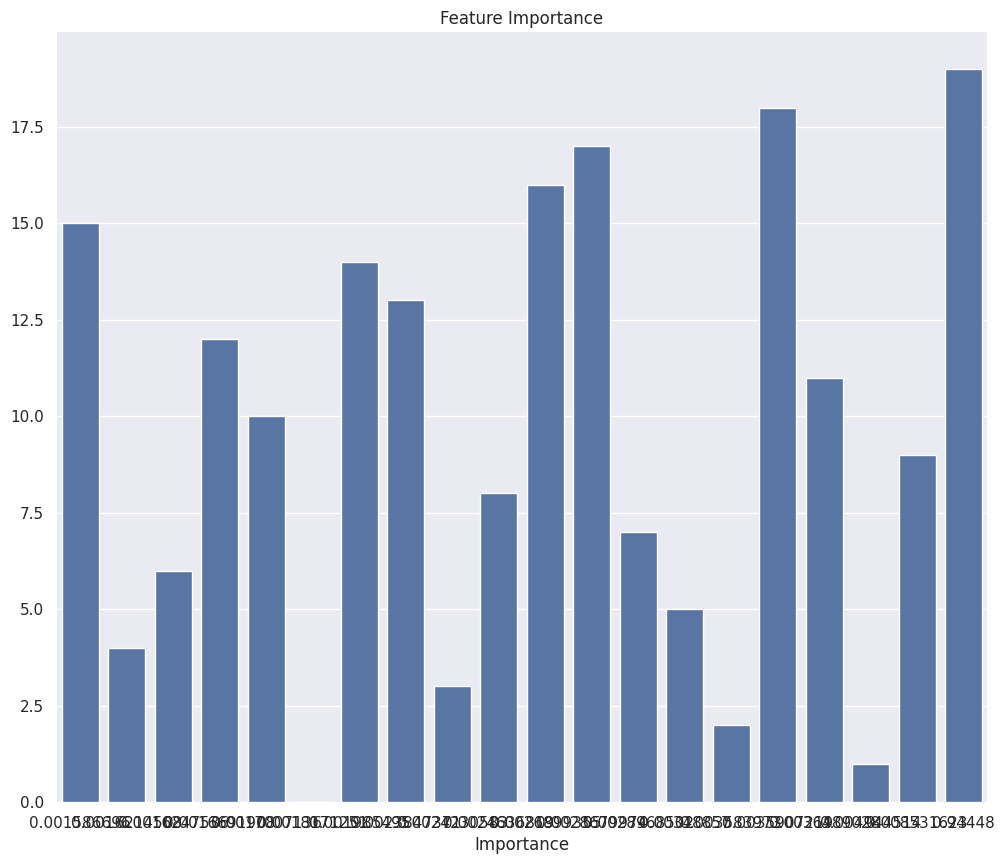

In [ ]:
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
lgbm_model = LGBMRegressor()
catboost_model = CatBoostRegressor()

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Create a voting ensemble model (default voting method is averaging)
ensemble_model = VotingRegressor(
    estimators=[
        ('xgboost', xgb_model),
        ('lgbm', lgbm_model),
        ('catboost', catboost_model)
    ]
)

# Use cross-validation to evaluate the ensemble model with R² as the scoring parameter
r2_scores = cross_val_score(ensemble_model, x, y, cv=5, scoring='r2')

print("R² scores for each fold:", r2_scores)
print("Average R²:", r2_scores.mean())

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
26:	learn: 0.0196871	total: 739ms	remaining: 26.6s
27:	learn: 0.0196521	total: 767ms	remaining: 26.6s
28:	learn: 0.0196232	total: 795ms	remaining: 26.6s
29:	learn: 0.0195976	total: 823ms	remaining: 26.6s
30:	learn: 0.0195717	total: 854ms	remaining: 26.7s
31:	learn: 0.0195483	total: 879ms	remaining: 26.6s
32:	learn: 0.0195282	total: 903ms	remaining: 26.5s
33:	learn: 0.0195104	total: 931ms	remaining: 26.4s
34:	learn: 0.0194943	total: 955ms	remaining: 26.3s
35:	learn: 0.0194803	total: 981ms	remaining: 26.3s
36:	learn: 0.0194636	total: 1.01s	remaining: 26.3s
37:	learn: 0.0194509	total: 1.03s	remaining: 26.2s
38:	learn: 0.0194399	total: 1.06s	remaining: 26.2s
39:	learn: 0.0194279	total: 1.09s	remaining: 26.2s
40:	learn: 0.0194177	total: 1.12s	remaining: 26.1s
41:	learn: 0.0194085	total: 1.14s	remaining: 26.1s
42:	learn: 0.0193996	total: 1.17s	remaining: 26s
43:	learn: 0.0193897	total: 1.2s	remaining: 26s
44:	learn: 0.0193820	total: 1.22s	remaining: 25.9s


In [ ]:
# Fit the ensemble model using the training data
ensemble_model.fit(x, y)
y_pred = ensemble_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 1117957, number of used features: 20
[LightGBM] [Info] Start training from score 0.504480
Learning rate set to 0.124117
0:	learn: 0.0459331	total: 36.5ms	remaining: 36.4s
1:	learn: 0.0415493	total: 70.8ms	remaining: 35.3s
2:	learn: 0.0378079	total: 105ms	remaining: 35s
3:	learn: 0.0346025	total: 137ms	remaining: 34.1s
4:	learn: 0.0319205	total: 170ms	remaining: 33.9s
5:	learn: 0.0297017	total: 204ms	remaining: 33.8s
6:	learn: 0.0278341	total: 238ms	remaining: 33.7s
7:	learn: 0.0262834	total: 271ms	remaining: 33.6s
8:	learn: 0.0249862	total: 305ms	remaining: 33.6s
9:	learn: 0.0239488	total: 339ms	remaining: 33.5s
10:	learn: 0.0231070	total: 373ms	remaining: 33.5s
11:	learn: 0.0224267	total: 406ms	remaining: 33.4s
12:	learn: 0.0218743	tot

In [ ]:
df = pd.read_csv('sample_submission.csv')
df['FloodProbability'] = y_pred
df

,id,FloodProbability
0,1117957,0.575736
1,1117958,0.458781
2,1117959,0.454324
3,1117960,0.470036
4,1117961,0.471331
...,...,...
745300,1863257,0.476134
745301,1863258,0.443334
745302,1863259,0.623577
745303,1863260,0.552472


In [ ]:
df.to_csv("ensemble.csv", index=False)

In [ ]:
# 각각을 사용해서 결과 값을 뽑고 앙상블 기법을 이용하여 최종 모델 완성

In [ ]:
# 딥러닝 기법 사용

In [ ]:
# 예측 모델을 만드는 방법

### 딥러닝 기법

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {train['FloodProbability'].shape}")

Shape of X_train: (1117957, 20)
Shape of y_train: (1117957,)


In [ ]:
y = train['FloodProbability']

In [ ]:
y

0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, random_state=100, shuffle=True)

### 일반적인 딥러닝 모델

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential([
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mse'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')


In [ ]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=2000,
          validation_split=0.2)

Epoch 1/100
12522/12522 [==============================] - 60s 4ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - mse: 0.0017 - val_loss: 5.8191e-04 - val_accuracy: 0.0000e+00 - val_mse: 5.8191e-04
Epoch 2/100
12522/12522 [==============================] - 55s 4ms/step - loss: 5.2319e-04 - accuracy: 0.0000e+00 - mse: 5.2319e-04 - val_loss: 6.6784e-04 - val_accuracy: 0.0000e+00 - val_mse: 6.6784e-04
Epoch 3/100
12522/12522 [==============================] - 55s 4ms/step - loss: 5.0407e-04 - accuracy: 0.0000e+00 - mse: 5.0407e-04 - val_loss: 5.8320e-04 - val_accuracy: 0.0000e+00 - val_mse: 5.8320e-04
Epoch 4/100
12522/12522 [==============================] - 57s 5ms/step - loss: 4.9858e-04 - accuracy: 0.0000e+00 - mse: 4.9858e-04 - val_loss: 6.2580e-04 - val_accuracy: 0.0000e+00 - val_mse: 6.2580e-04
Epoch 5/100
12522/12522 [==============================] - 55s 4ms/step - loss: 4.9671e-04 - accuracy: 0.0000e+00 - mse: 4.9671e-04 - val_loss: 6.7960e-04 - val_accuracy: 0.0000e+00 - val_mse:

KeyboardInterrupt: 

### Bayesian Neural Networks (BNNs)

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfpl = tfp.layers

def build_bnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tfp.layers.DenseFlipout(512, activation='relu'),
        tfp.layers.DenseFlipout(256, activation='relu'),
        tfp.layers.DenseFlipout(128, activation='relu'),
        tfp.layers.DenseFlipout(64, activation='relu'),
        tfp.layers.DenseFlipout(32, activation='relu'),
        tfp.layers.DenseFlipout(16, activation='relu'),
        tfp.layers.DenseFlipout(1)
    ])
    return model

# Build the BNN model
bnn_model = build_bnn_model(input_shape=X_train.shape[1:])

# Compile the model
bnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss=lambda y, rv_y: -rv_y.log_prob(y),  # Negative log-likelihood as loss function
                  metrics=['mae'])

# Train the model
history = bnn_model.fit(X_train, y_train, epochs=100, validation_split=0.15, verbose=1)

### Normalizing Flow

In [ ]:
model = Sequential([
    tfp.layers.Inverse(tfp.bijectors.Chain([
        tfp.bijectors.Shift(tf.Variable(tf.zeros(shape=(20,))), name='shift'),
        tfp.bijectors.Scale(tf.Variable(tf.ones(shape=(20,))), name='scale'),
        tfp.bijectors.AffineScalar(shift=tf.Variable(0.), scale=tf.Variable(1.), name='affine')
    ])), name='initial_bijector'),
    tfp.layers.DenseFlipout(512, activation='relu'),
    tfp.layers.DenseFlipout(256, activation='relu'),
    tfp.layers.DenseFlipout(128, activation='relu'),
    tfp.layers.DenseFlipout(64, activation='relu'),
    tfp.layers.DenseFlipout(32, activation='relu'),
    tfp.layers.DenseFlipout(16, activation='relu'),
    tfp.layers.DenseFlipout(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mse'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

hist = model.fit(x_train, y_train, epochs=10, batch_size=2000,
          validation_split=0.2)


### QRNN 기법

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Dropout, Activation
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(X_train.shape[1], 1))

# Define the QRNN layer
qrnn_layer = tf.keras.layers.StackedRNNCells([
    tf.keras.layers.LSTMCell(64, return_sequences=True),
    tf.keras.layers.LSTMCell(64, return_sequences=True),
    tf.keras.layers.LSTMCell(64, return_sequences=True),
    tf.keras.layers.LSTMCell(64, return_sequences=True),
    tf.keras.layers.LSTMCell(64, return_sequences=True),
    tf.keras.layers.LSTMCell(64, return_sequences=True),
    tf.keras.layers.LSTMCell(64)
])

# Connect the input layer to the QRNN layer
x = qrnn_layer(input_layer)

# Add dropout layers
x = Dropout(0.2)(x)

# Add dense layers
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(8, activation='relu')(x)
x = Dropout(0.2)(x)

# Add the output layer
output_layer = Dense(1)(x)

# Create the QRNN model
qrnn_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the QRNN model
qrnn_model.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mse'])

# Train the QRNN model
qrnn_model.fit(X_train, y_train, epochs=10, batch_size=2000, validation_split=0.2)
